# RSJ model: CPR of $I(\phi)=[\sin(\phi)+\eta\sin(2\phi)]+A(\sin(\phi+C)+\eta\sin[2(\phi+C)])$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from scipy.integrate import odeint
from scipy.optimize import fmin
from scipy.io import savemat,loadmat
import h5py

In [2]:
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage[utf8]{inputenc}',
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [3]:
%matplotlib inline

In [4]:
%load_ext Cython

In [4]:
h=6.62607004e-34
hbar=h/2/np.pi
Qe=1.602176634e-19
Ic=2e-6
Rn=13

In [5]:
%%cython
cimport numpy as np
from libc.math cimport sin, cos, atanh,pi
import numpy as np

h=6.62607004e-34
hbar=h/2/np.pi
Qe=1.602176634e-19
Ic=2e-6
Rn=13
cdef double CPR(double G, double A, double eta, double C):
    '''
        Current-phase relationship for the junction
    '''
    return sin(G)+eta*sin(2*G)+A*sin(G+C)+A*eta*sin(2*G+2*C)
    
cpdef double dGdt(G,double t,double I,double A, double eta,double C):
    '''
        Define y = [gamma]
        dy_dt =  - f(gamma) + i(t)) 
    '''
    der = 2*Qe*Rn*(I-Ic*CPR(G,A,eta,C))/hbar
    return der 


### Plot CPR

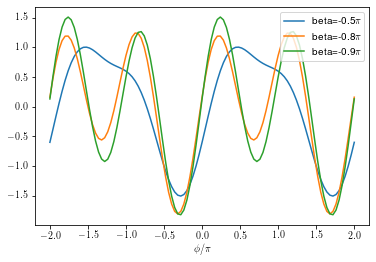

In [187]:
eta=0.9#np.array([0.9])
A=0.6#np.linspace(0,1,6)
def CPR2(G, A, eta, C):
    return np.sin(G)+eta*np.sin(2*G)+A*np.sin(G+C)+A*eta*np.sin(2*G+2*C)
phi=np.linspace(-2,2,101)*np.pi

beta=np.pi*np.array([-0.5,-0.8,-0.9])#np.linspace(-0.8,0.8,3)

Is=np.empty([len(phi),len(beta)])
plt.figure()
for j in range(0,len(beta)):
    for i in range(0,len(phi)):
        Is[i,j]=CPR2(phi[i],A,eta,beta[j])
    plt.plot(phi/np.pi,Is[:,j],label="beta="+str(np.round(beta[j]/np.pi,3))+"$\pi$")
plt.xlabel('$\phi/\pi$')
plt.legend(loc=1)


## Load Data and Plot

In [10]:
import sys
#sys.path.insert(0, 'C:/Users/QMDla/Documents/GitHub/data_file_manipulations/')
sys.path.insert(0, '/Volumes/GoogleDrive/My Drive/GitHub/data_file_manipulations/')
import files_manipulation

In [12]:
import importlib
importlib.reload(files_manipulation)

<module 'files_manipulation' from '/Volumes/GoogleDrive/My Drive/GitHub/data_file_manipulations/files_manipulation.py'>

In [13]:
dataDir = "./"
files_manipulation.merge_multiple_mat(dataDir,True) # True for saving .h5


IDC.shape=(1600,)
C.shape=(41,)
V.shape=(41, 1600, 121)
DVDI.shape=(41, 1600, 121)
eta.shape=(121,)
A.shape=(121,)


### Load hdf5

In [17]:
fd= h5py.File('merged.h5','a')

In [7]:
list(fd.keys())

['A', 'C', 'DVDI', 'IDC', 'V', 'eta']

In [136]:
A=fd['A'][...]
print(A.shape)
C=fd['C'][...]
print(C.shape)
DVDI=fd['DVDI'][...]
print(DVDI.shape)
IDC=fd['IDC'][...]
print(IDC.shape)
V=fd['V'][...]
print(V.shape)
eta=fd['eta'][...]
print(eta.shape)

(121,)
(41,)
(41, 1600, 121)
(1600,)
(41, 1600, 121)
(121,)


In [9]:
print(A)
print(eta)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.8 0.8
 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.1 0.2 0.3 0.4 0.5 0.6
 0.7 0.8 0.9 1.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.1 0.2
 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
 1.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.1 0.2 0.3 0.4 0.5
 0.6 0.7 0.8 0.9 1.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.1
 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8
 0.9 1.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


### Plot all the $R(I_{DC}, C)$ maps

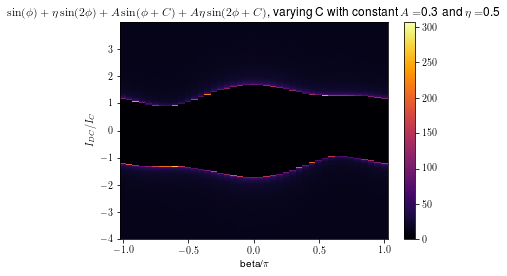

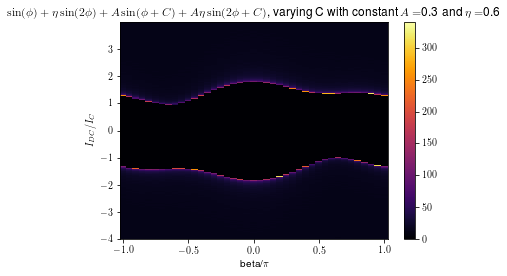

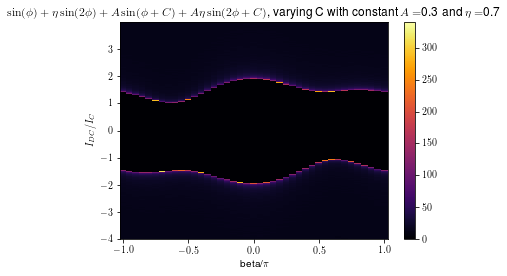

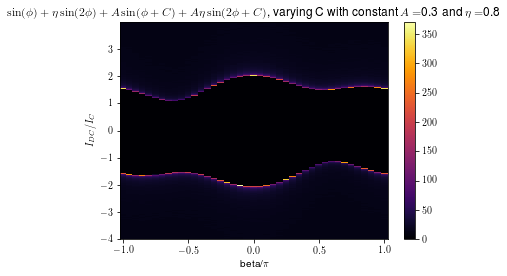

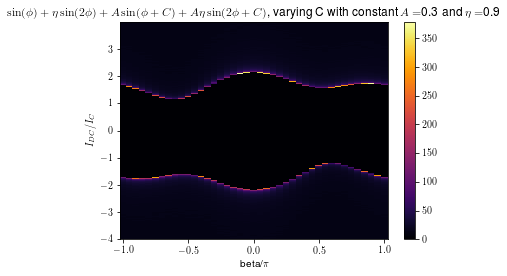

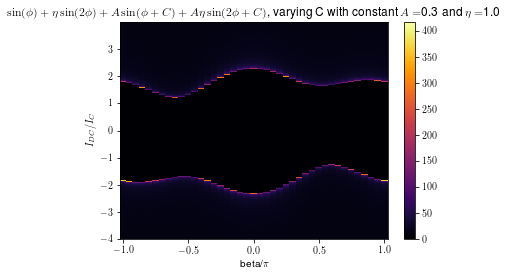

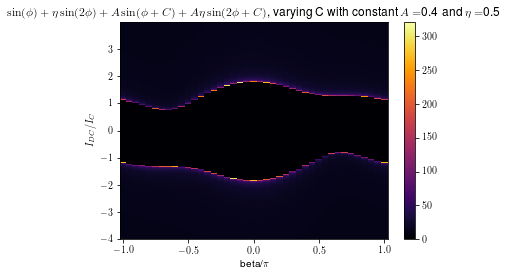

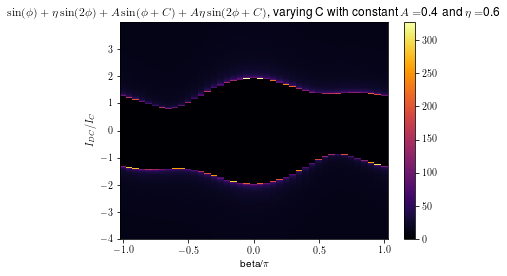

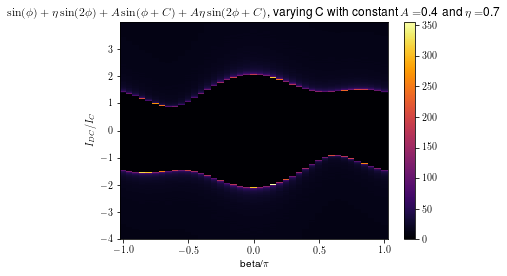

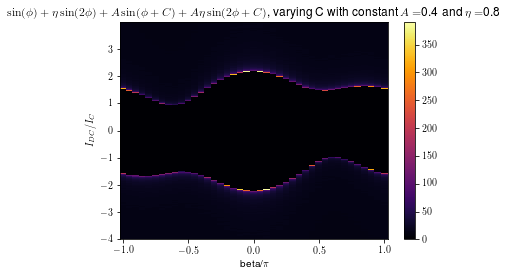

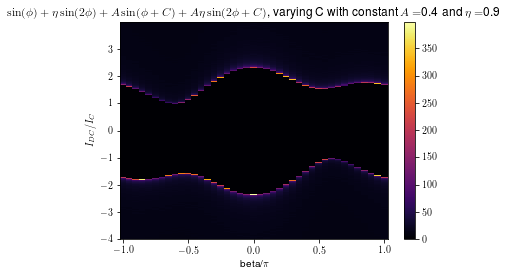

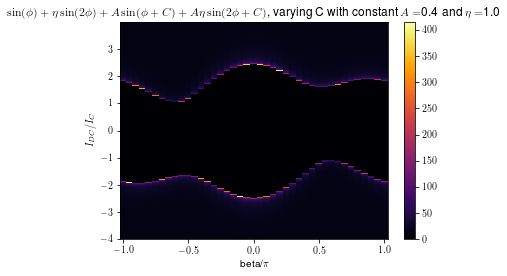

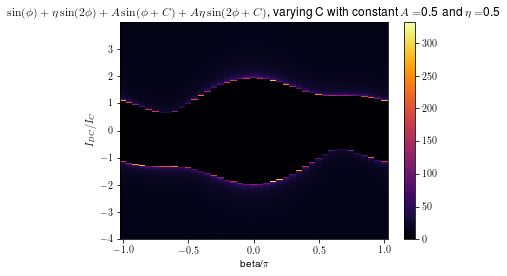

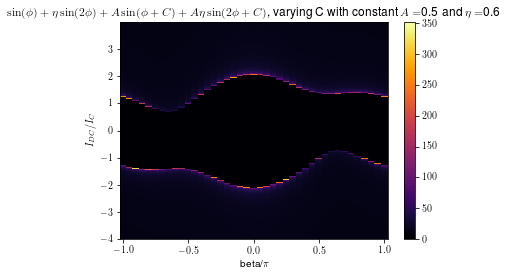

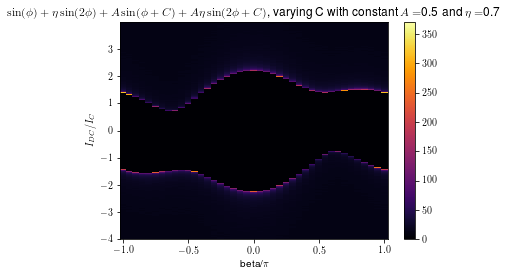

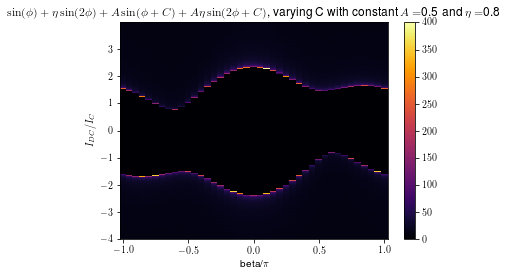

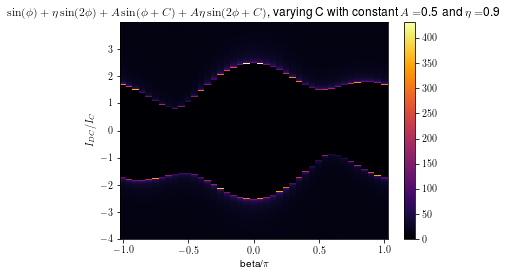

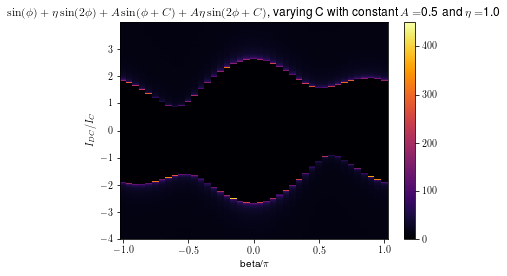

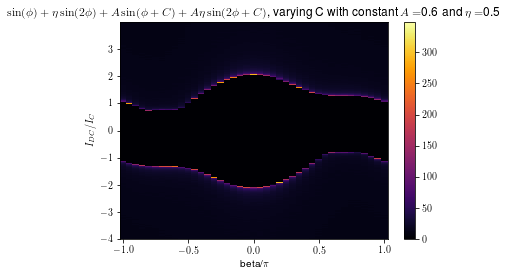

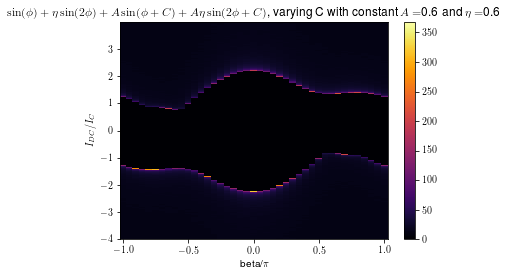

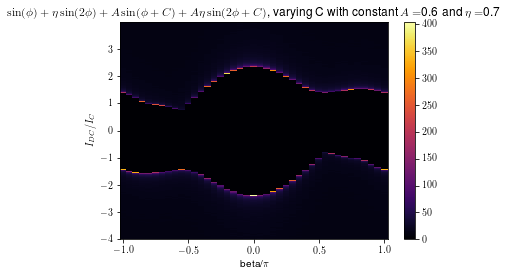

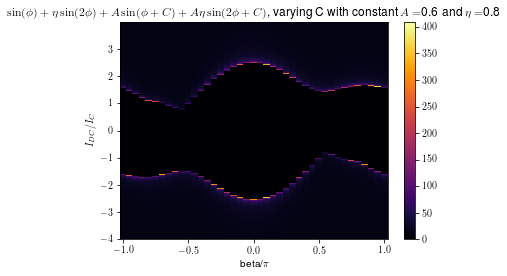

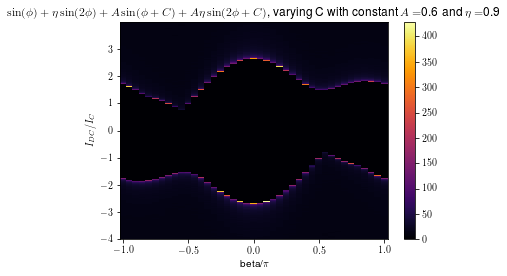

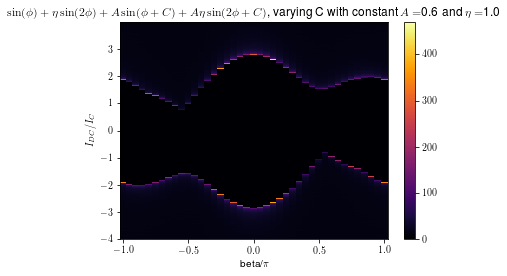

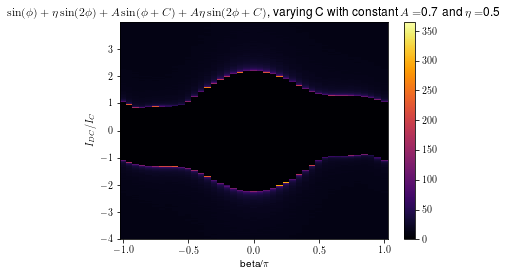

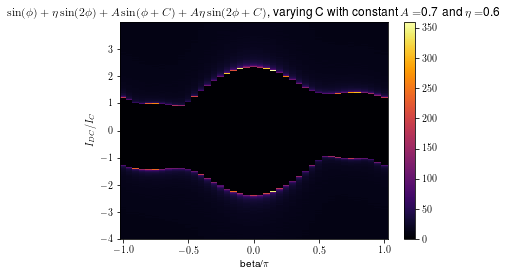

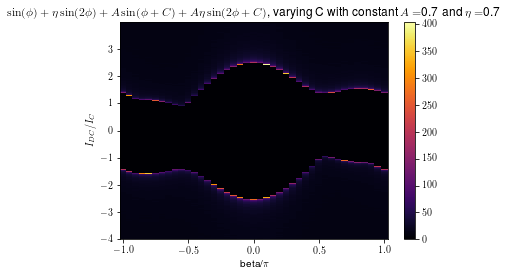

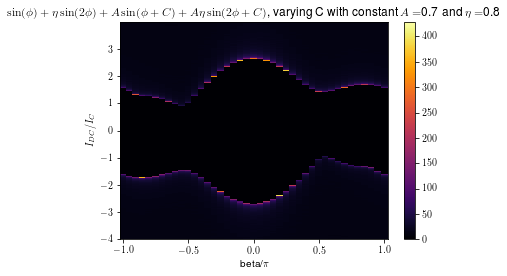

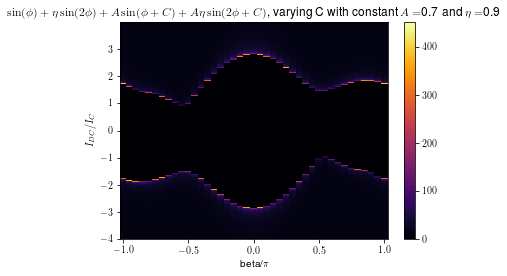

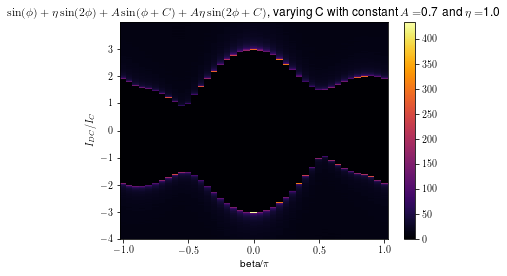

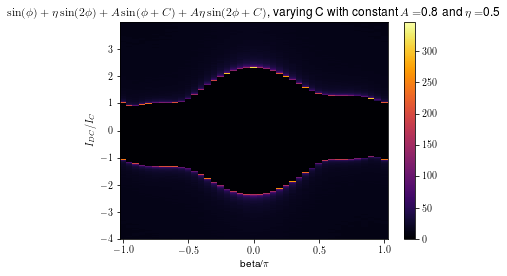

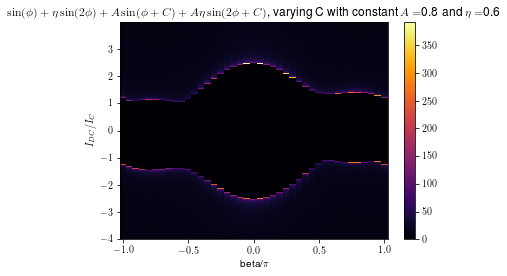

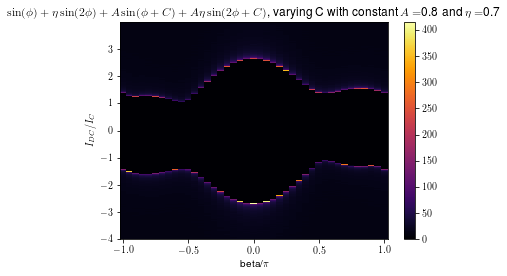

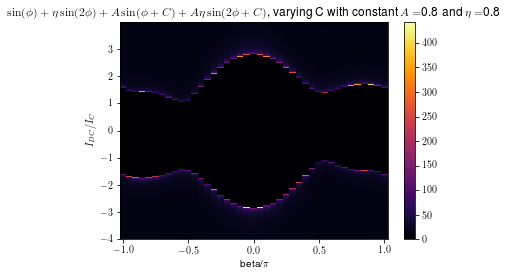

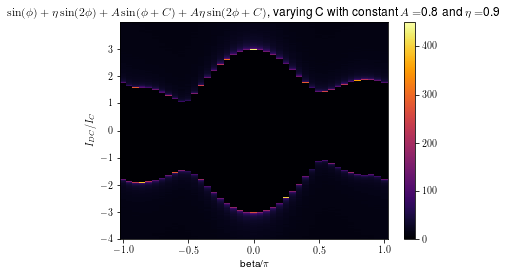

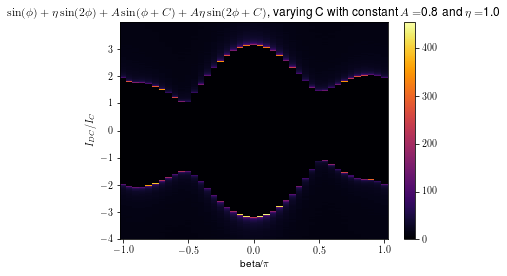

In [472]:
plt.figure()
for i in range(0,len(eta)):
    if (A[i] >0.25) and ( A[i]<0.85) and (eta[i]>0.45):

        plt.pcolor(C/np.pi,IDC/Ic,np.squeeze(np.transpose(DVDI[:,:,i])),vmin=0,cmap='inferno',linewidth=0,rasterized=True,shading='auto')
        plt.xlabel("beta/$\pi$")
        plt.ylabel("$I_{DC}/I_C$")
        plt.colorbar()
        plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A[i])+" and $\eta=$"+str(eta[i]))
        plt.show()

### Find $I_{C+}$, $I_{C-}$, asymmetry, and peak heights

In [10]:
import sys
sys.path.insert(0, '/Volumes/GoogleDrive/My Drive/GitHub/Josephson-junction-simulations/')

import extract_Ic_and_peak

In [11]:
import importlib
importlib.reload(extract_Ic_and_peak)

<module 'extract_Ic_and_peak' from '/Volumes/GoogleDrive/My Drive/GitHub/Josephson-junction-simulations/extract_Ic_and_peak.py'>

### Find $I_{C+}$ and $I_{C-}$  and asymmetry = $I_{C-}/I_{C+}$

In [12]:
Icn=np.empty([len(C),len(eta)])
Icp=np.empty([len(C),len(eta)])
asymmetry=np.empty([len(C),len(eta)])

for j in range(0,len(eta)):
    for i in range(0,len(C)):
        Icn[i,j],Icp[i,j]=extract_Ic_and_peak.extract_Ic(IDC,np.squeeze(DVDI[i,:,j]))#,distance_guess,height_guess)
        if(Icn[i,j]==0):
            print(C[i]/np.pi,eta[j],Icn[i,j],Icp[i,j])
            plt.figure()
            plt.plot(IDC,DVDI[i,:,j])
            plt.show()
            asymmetry[i,j]=1
        else:
            asymmetry[i,j]=Icn[i,j]/Icp[i,j]

### Load experimental data

In [5]:
exp_data=loadmat("../dense_sweeps_27mK_0mT.mat")
Sweep_np=exp_data['dense27mK0mTnp']
print(Sweep_np.shape)
Sweep_pn=exp_data['dense27mK0mTpn']

(2001, 2)


1.1e-06 9.2e-07
1.1956521739130435


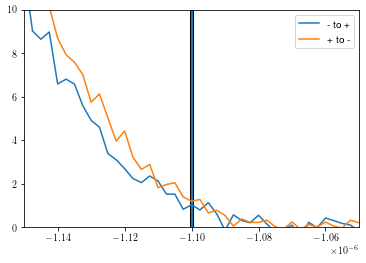

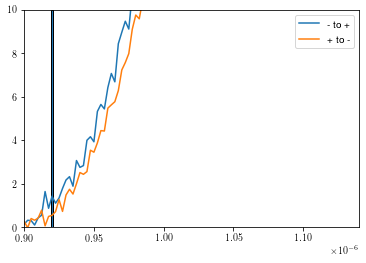

In [19]:
plt.figure()
plt.plot(Sweep_np[:,0],Sweep_np[:,1],label="- to +")
plt.plot(Sweep_pn[:,0],Sweep_pn[:,1],label="+ to -")
###Define the Ic as the I_DC reaches 1 Ohm.
Icn_exp=1.1e-6
Icp_exp=0.92e-6
print(Icn_exp,Icp_exp)
print(Icn_exp/Icp_exp)
plt.arrow(-Icn_exp, 10,0,-10,width=1e-9)
plt.xlim([-1.15e-6,-1.05e-6])
plt.ylim([0,10])
plt.legend()
plt.show()

plt.figure()
plt.plot(Sweep_np[:,0],Sweep_np[:,1],label="- to +")
plt.plot(Sweep_pn[:,0],Sweep_pn[:,1],label="+ to -")
plt.arrow(Icp_exp, 10,0,-10,width=1e-9)
plt.xlim([0.9e-6,1.14e-6])
plt.ylim([0,10])
plt.legend()
plt.show()

In [20]:
from scipy.signal import find_peaks
Index_np,Height_np =find_peaks(Sweep_np[:,1],distance=600,height=2)
print(Index_np,Height_np['peak_heights'])
Index_pn,Height_pn =find_peaks(Sweep_pn[:,1],distance=600,height=2)
print(Index_pn,Height_pn['peak_heights'])

[ 492 1449] [66.6718804 44.9880164]
[ 554 1506] [45.327406 65.164264]


In [21]:
peak_n_exp=(Height_np['peak_heights'][0]+Height_pn['peak_heights'][1])/2
peak_p_exp=(Height_np['peak_heights'][1]+Height_pn['peak_heights'][0])/2
print(peak_n_exp,peak_p_exp)
peak_ratio_exp=np.round(peak_n_exp/peak_p_exp,3)
print(peak_ratio_exp)
print(Sweep_np[Index_np,0],Sweep_pn[Index_pn,0])

65.91807220000001 45.1577112
1.46
[-1.2700e-06  1.1225e-06] [ 1.115e-06 -1.265e-06]


In [130]:
IDC.shape

(1600,)

### ***Analysis with Skewed Gaussian fit moved to a new notebook

### Trying to do the convolution

In [258]:
from scipy.signal import convolve

In [326]:
convolved=convolve(DVDI[6,:,A_idx],_2Skewed_Gaussians(IDC_exp,*popt_two),mode='same',method='direct')

In [320]:
convolved.shape

(1600,)

In [261]:
(_Skewed_Gaussian(IDC_left,*popt_left)).shape

(300,)

In [262]:
DVDI[6,:,A_idx].shape

(1600,)

(-5e-06, 5e-06)

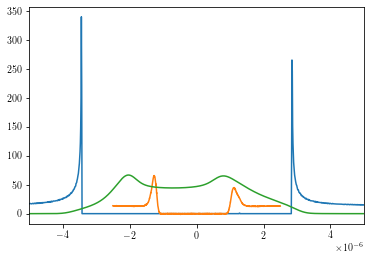

In [327]:
plt.figure()
plt.plot(IDC,DVDI[6,:,A_idx])
plt.plot(IDC_exp,DVDI_exp_avg)
plt.plot(IDC,convolved/4000)
plt.xlim([-0.5e-5,0.5e-5])
#plt.ylim([0,100])

### Trying to analyze the slope of the I-V curve, instead of peak heights

In [35]:
V.shape

(41, 1600, 121)

In [41]:
A_idx=97
print(eta[A_idx],A[A_idx])

0.9 0.8


In [62]:
V_n=V[:,:-800,:]
IDC_n=IDC[:-800]

In [63]:
V_p=V[:,800:,:]
IDC_p=IDC[800:]

In [73]:
C[20]/np.pi

0.0

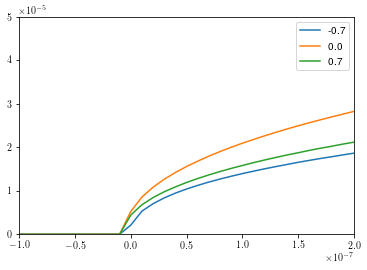

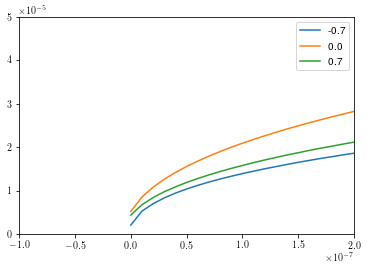

In [85]:
C_idx=[6,20,34]
plt.figure()
for i in C_idx:
    plt.plot(IDC-Icp[i,A_idx],V[i,:,A_idx],label=str(np.round(C[i]/np.pi,3)))
plt.xlim([-0.1e-6,0.2e-6])
plt.ylim([0,0.00005])
plt.legend(loc=0)
plt.show()
for i in C_idx:
    plt.plot(IDC[IDC>=Icp[i,A_idx]]-Icp[i,A_idx],V[i,IDC>=Icp[i,A_idx],A_idx],label=str(np.round(C[i]/np.pi,3)))
plt.xlim([-0.1e-6,0.2e-6])
plt.ylim([0,0.00005])
plt.legend(loc=0)
plt.show()

<ipython-input-43-ffe9bba97a33>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(C/np.pi,IDC,np.transpose(np.squeeze(V[:,:,A_idx])))


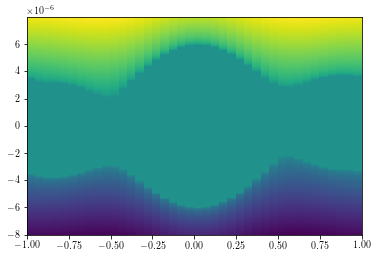

In [43]:
plt.figure()
plt.pcolormesh(C/np.pi,IDC,np.transpose(np.squeeze(V[:,:,A_idx])))

### Smoothing of dV/dI Simulation Data by Taking Moving Averages

In [435]:
#### Moving average by while loop
window_size = np.array([1,10,20,30,40,50])
DVDI_sample=DVDI
DVDI_avg=np.zeros([len(C),len(IDC),len(eta),len(window_size)])
for w in range(0,len(window_size)):
    print(w)
    for k in range(0,len(eta)):
        for j in range(0,len(C)):
            i = 0
            while i < len(IDC) - window_size[w] + 1:
                DVDI_avg[j,i,k,w] = sum(DVDI_sample[j,i : i + window_size[w],k]) / window_size[w]
                i += 1

0
1
2
3
4
5


In [54]:
### Moving average by convolution
window_size = np.array([1,10,20,30,40,50])
DVDI_avg=np.zeros([len(C),len(IDC),len(eta),len(window_size)])
for w in range(0,len(window_size)):
    window=np.ones(window_size[w])
    for k in range(0,len(eta)):
        for j in range(0,len(C)):
            DVDI_avg[j,:,k,w] = np.convolve(np.squeeze(DVDI[j,:,k]),window/window.sum(),mode='same')


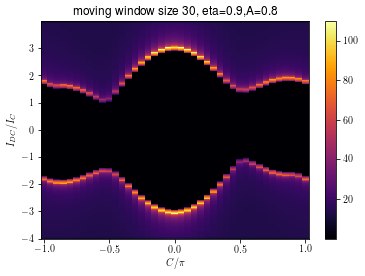

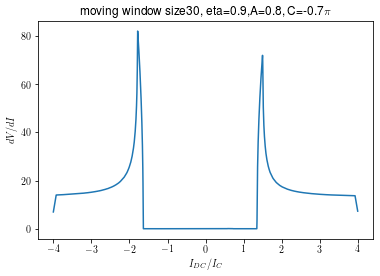

In [62]:
plt.figure()
plt.pcolormesh(C/np.pi,IDC/Ic,np.transpose(DVDI_avg[:,:,97,3]),cmap='inferno',shading='auto')
plt.colorbar()
plt.xlabel('$C/\pi$')
plt.ylabel('$I_{DC}/I_C$')
plt.title('moving window size '+str(window_size[3])+', eta=0.9,A=0.8')
plt.show()

plt.figure()
plt.plot(IDC/Ic,(DVDI_avg[6,:,97,3]))
plt.ylabel('$dV/dI$')
plt.xlabel('$I_{DC}/I_C$')
plt.title('moving window size'+str(window_size[3])+', eta=0.9,A=0.8, C='+str(np.round(C[6]/np.pi,3))+"$\pi$")
plt.show()

In [73]:
peak_n_avg=np.empty([len(C),len(eta),len(window_size)])
peak_p_avg=np.empty([len(C),len(eta),len(window_size)])

for w in range(0,len(window_size)):
    for j in range(0,len(eta)):
        for i in range(0,len(C)):
            peak_n_avg[i,j,w],peak_p_avg[i,j,w]=extract_Ic_and_peak.extract_height(IDC,DVDI_avg[i,:,j,w])


### Averaged peak heights of all the $A$, $\eta$ pairs at different window sizes

A=  0.6 eta=  0.9 75


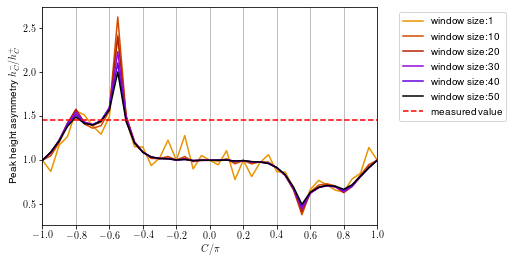

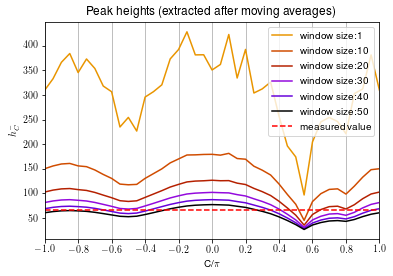

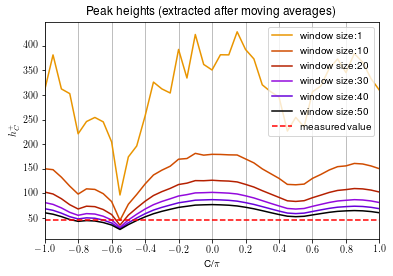

1


In [162]:
colors = np.flip(plt.cm.gnuplot(np.linspace(0,1,7)),axis=0)
count=0
H_asymm_exp=np.ones(len(C))*1.46

for A_idx in range(0,len(A)):
    if (A[A_idx] >0.55) and ( A[A_idx]<0.65) and (eta[A_idx]>0.85) and (eta[A_idx]<0.95):
        count+=1
        print("A= ",A[A_idx],"eta= ",eta[A_idx],A_idx)
        plt.figure()
        cindx=1
        for w in range(0,len(window_size)):
            plt.plot(C/np.pi,peak_n_avg[:,A_idx,w]/peak_p_avg[:,A_idx,w],label='window size:'+str(window_size[w])\
                    ,color=colors[cindx])
            cindx+=1
        plt.plot(C/np.pi,H_asymm_exp,'r--',label='measured value')
        plt.xlabel("$C/\pi$")
        plt.ylabel("Peak height asymmetry $h^-_C/h^+_C$")
        plt.xticks(np.arange(-1,1.2,0.2))
        plt.grid(axis='x')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        #plt.savefig('peak_asymmetry_A'+str(A[A_idx])+'_eta'+str(eta[A_idx])+'_moving_avgs.png',bbox_inches='tight')
        plt.xlim([-1,1])
        plt.show()
        plt.figure()
        peak_h_exp_p=np.ones(len(C))*45
        peak_h_exp_n=np.ones(len(C))*66
        cindx=1
        for w in range(0,len(window_size)):
            plt.plot(C/np.pi,peak_n_avg[:,A_idx,w], label='window size:'+str(window_size[w])\
                     ,color=colors[cindx])

            cindx+=1   
        plt.plot(C/np.pi,peak_h_exp_n,'r--',label='measured value')
        plt.title('Peak heights (extracted after moving averages)')
        plt.legend(loc=1)#bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(-1,1.2,0.2))
        plt.grid(axis='x')
        plt.xlim([-1,1])
        plt.ylabel('$h^{-}_C$')
        plt.xlabel('C/$\pi$')
        plt.savefig('PAPER_peak_n_A'+str(A[A_idx])+'_eta'+str(eta[A_idx])+'_moving_avgs.pdf',bbox_inches='tight')

        plt.show()
        plt.figure()

        cindx=1
        for w in range(0,len(window_size)):
            plt.plot(C/np.pi,peak_p_avg[:,A_idx,w],label='window size:'+str(window_size[w])\
                     ,color=colors[cindx])
            cindx+=1   
        plt.plot(C/np.pi,peak_h_exp_p,'r--',label='measured value')
        plt.title('Peak heights (extracted after moving averages)')
        plt.legend(loc=1)#bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(-1,1.2,0.2))
        plt.ylabel('$h^{+}_C$')
        plt.xlabel('C/$\pi$')
        plt.grid(axis='x')
        plt.xlim([-1,1])
        plt.savefig('PAPER_peak_p_A'+str(A[A_idx])+'_eta'+str(eta[A_idx])+'_moving_avgs.pdf',bbox_inches='tight')

        plt.show()
print(count)

## Single cut of averaged peak height

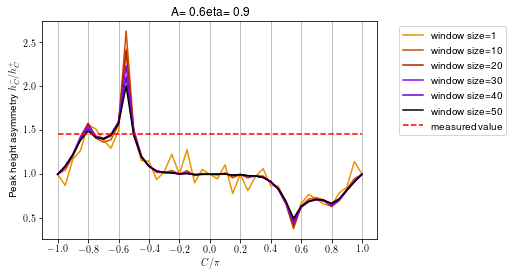

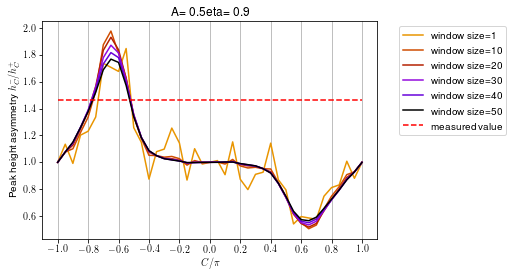

In [152]:
colors = np.flip(plt.cm.gnuplot(np.linspace(0,1,7)),axis=0)
plt.figure()
A_idx=75
cindx=1
for w in range(0,len(window_size)):
    plt.plot(C/np.pi,peak_n_avg[:,A_idx,w]/peak_p_avg[:,A_idx,w],label='window size='+str(window_size[w])\
            ,color=colors[cindx])
    cindx+=1
plt.plot(C/np.pi,H_asymm_exp,'r--',label='measured value')
plt.xlabel("$C/\pi$")
plt.ylabel("Peak height asymmetry $h^-_C/h^+_C$")
plt.xticks(np.arange(-1,1.2,0.2))
plt.grid(axis='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("A= "+str(A[A_idx])+"eta= "+str(eta[A_idx]))
plt.savefig('PAPER_peak_asymmetry_A'+str(A[A_idx])+'_eta'+str(eta[A_idx])+'_moving_avgs.pdf',bbox_inches='tight')

plt.show()
plt.figure()
A_idx=64
cindx=1
for w in range(0,len(window_size)):
    plt.plot(C/np.pi,peak_n_avg[:,A_idx,w]/peak_p_avg[:,A_idx,w],label='window size='+str(window_size[w])\
            ,color=colors[cindx])
    cindx+=1
plt.plot(C/np.pi,H_asymm_exp,'r--',label='measured value')


plt.xlabel("$C/\pi$")
plt.ylabel("Peak height asymmetry $h^-_C/h^+_C$")
plt.xticks(np.arange(-1,1.2,0.2))
plt.grid(axis='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("A= "+str(A[A_idx])+"eta= "+str(eta[A_idx]))

#plt.savefig('PAPER_peak_asymmetry_A'+str(A[A_idx])+'_eta'+str(eta[A_idx])+'_moving_avgs.pdf',bbox_inches='tight')
plt.show()

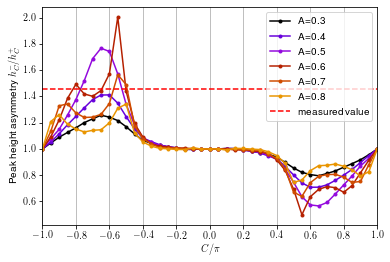

In [176]:
colors = plt.cm.gnuplot(np.linspace(0,1,7))
plt.figure()
w=-1
cindx=0
for A_idx in [42,53,64,75,86,97]:
    plt.plot(C/np.pi,peak_n_avg[:,A_idx,w]/peak_p_avg[:,A_idx,w],'.-',label='A='+str(A[A_idx])\
            ,color=colors[cindx])
    cindx+=1
plt.plot(C/np.pi,H_asymm_exp,'r--',label='measured value')
plt.xlabel("$C/\pi$")
plt.ylabel("Peak height asymmetry $h^-_C/h^+_C$")
plt.xticks(np.arange(-1,1.2,0.2))
plt.grid(axis='x')
plt.legend(loc=1)#bbox_to_anchor=(0.75, 1), loc='upper left')
plt.xlim([-1,1])
plt.savefig('PAPER_peak_asymmetry_eta'+str(eta[A_idx])+'_moving_avgs.pdf',bbox_inches='tight')

plt.show()

## Ic Asymmetry

In [117]:
Ic_asymm_exp=np.ones(len(C))*1.2

### Asymmetry vs C, grouped by the same A (selected)

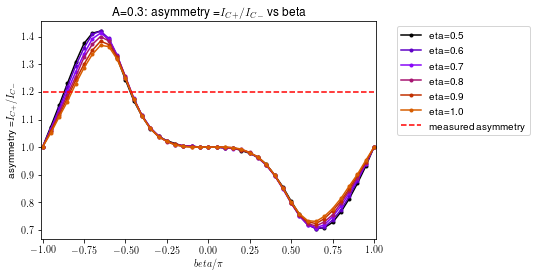

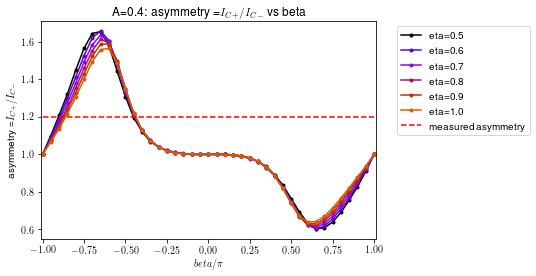

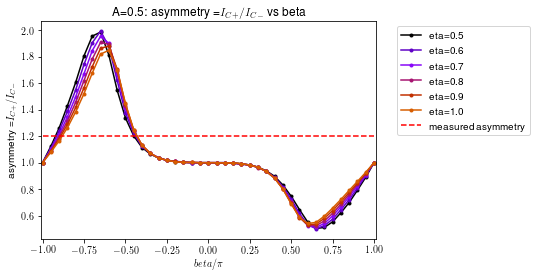

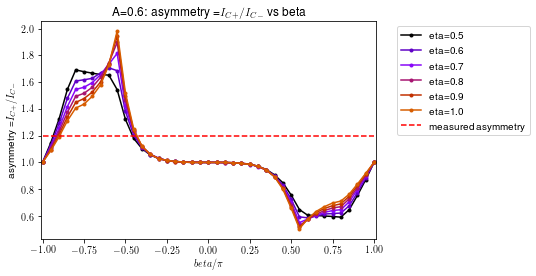

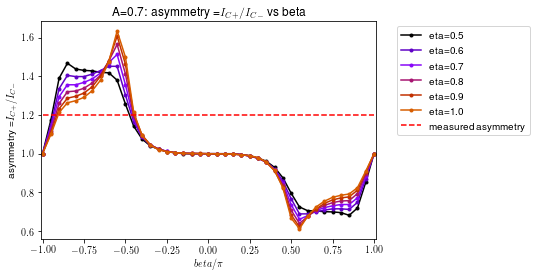

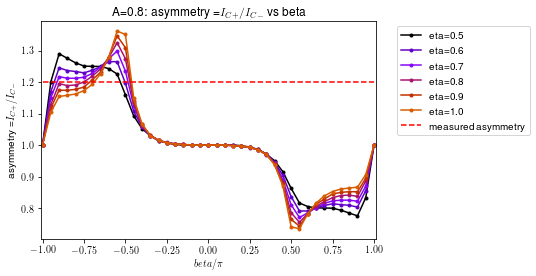

In [460]:
colors = plt.cm.gnuplot(np.linspace(0,1,15))
for j in range(3,size_A-2):
        plt.figure()
        cindx=0
        for i in range(0+j*size_A,(j+1)*size_A): 
            if (eta[i]>0.45):
                plt.plot(C/np.pi,asymmetry[:,i],'.-',label='eta='+str(eta[i]),color=colors[2*cindx])
                cindx=cindx+1
        plt.plot(C/np.pi,Ic_asymm_exp,'r--',label="measured asymmetry")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("A="+str(A[0+j*size_A])+": asymmetry =$I_{C+}/I_{C-}$ vs beta")
        plt.xlim([-1.01,1.01])
        plt.xlabel("$beta/\pi$")
        plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
        plt.savefig('Ic_asymmetries_A='+str(round(A[j*size_A],3))+'.png',bbox_inches='tight')
        plt.show()


### Asymmetry vs C, grouped by the same eta (selected) --> PAPER

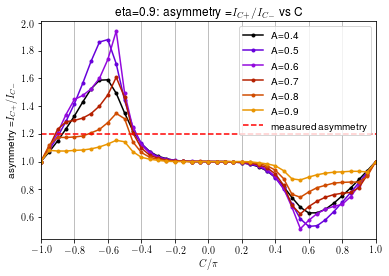

In [175]:
colors = plt.cm.gnuplot(np.linspace(0,1,7))
for j in range(0,size_A):
    if (eta[j]>0.85) and (eta[j]<0.95):
        plt.figure()
        cindx=0
        for i in range(j,len(eta),size_A):
            if (A[i] >0.35) and ( A[i]<0.95):
                plt.plot(C/np.pi,asymmetry[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
                cindx+=1
        plt.plot(C/np.pi,Ic_asymm_exp,'r--',label="measured asymmetry")
        plt.legend(loc=1)#bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title('eta='+str(eta[j])+': asymmetry =$I_{C+}/I_{C-}$ vs C')
        plt.xlim([-1,1])
        plt.xlabel('$C/\pi$')
        plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
        plt.xticks(np.arange(-1,1.2,0.2))
        plt.grid(axis='x')
        plt.savefig('PAPER_Ic_asymmetries_eta='+str(round(eta[j],3))+'.pdf',bbox_inches='tight')
        plt.show()

### Asymmetry vs C, grouped by the same A

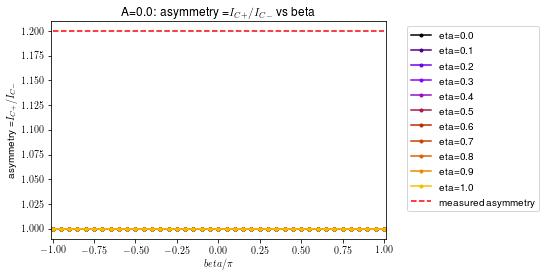

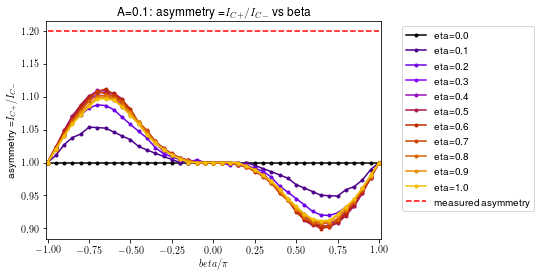

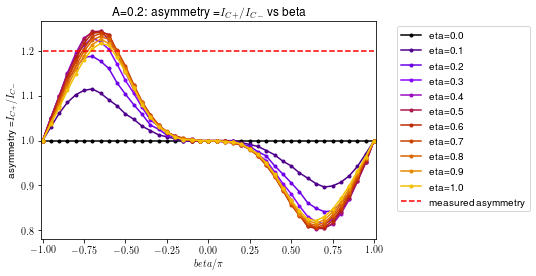

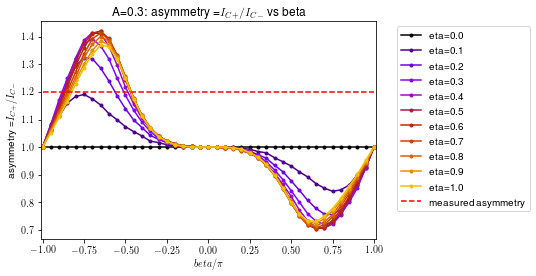

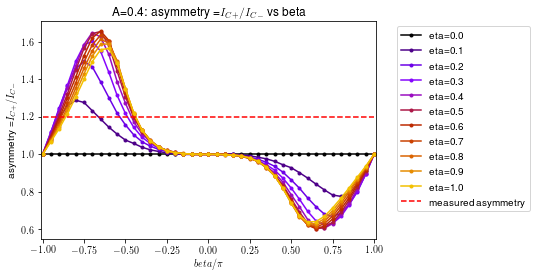

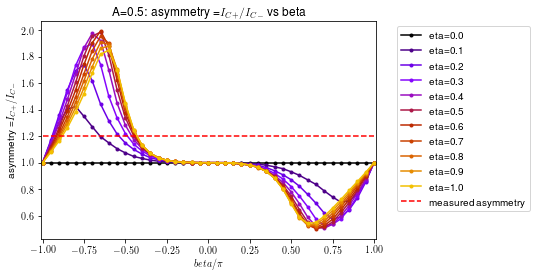

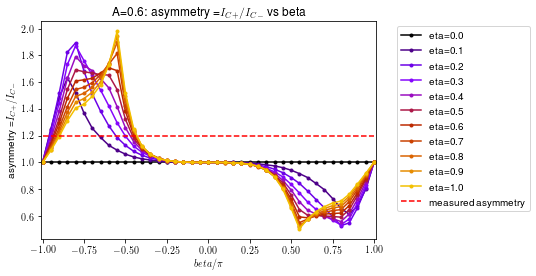

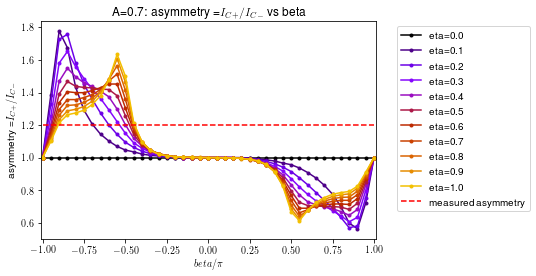

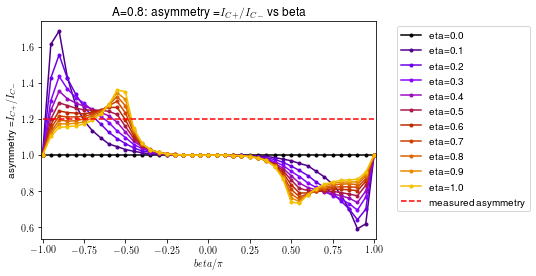

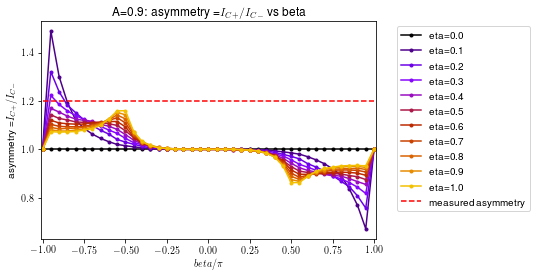

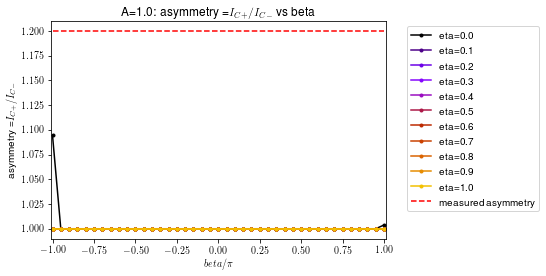

In [400]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,Ic_asymm_exp,'r--',label="measured asymmetry")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("A="+str(A[0+j*size_A])+": asymmetry =$I_{C+}/I_{C-}$ vs beta")
    plt.xlim([-1.01,1.01])
    plt.xlabel("$beta/\pi$")
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

### Asymmetry vs C, grouped by the same eta

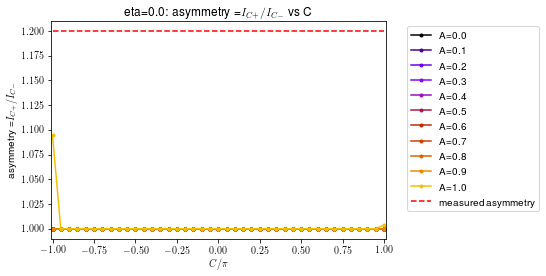

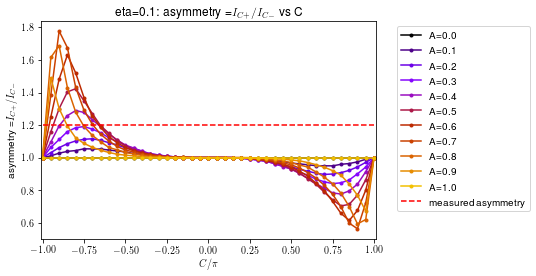

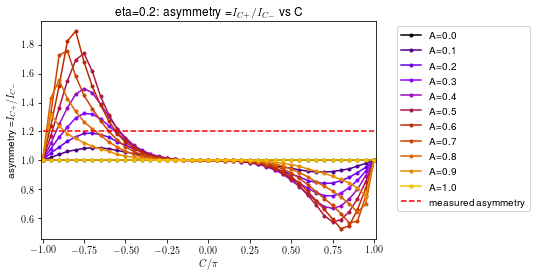

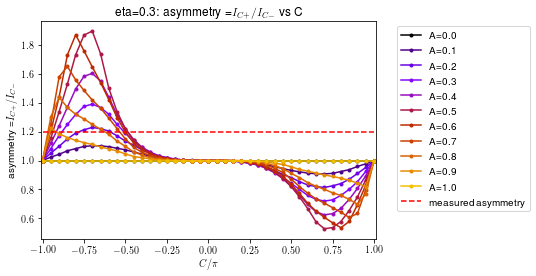

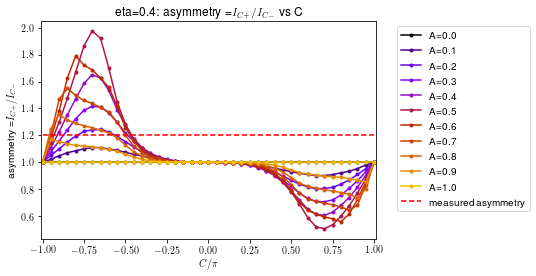

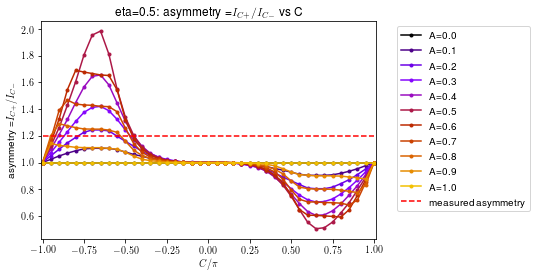

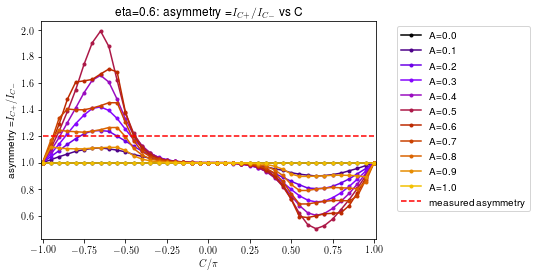

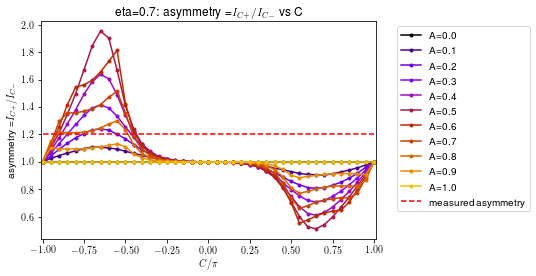

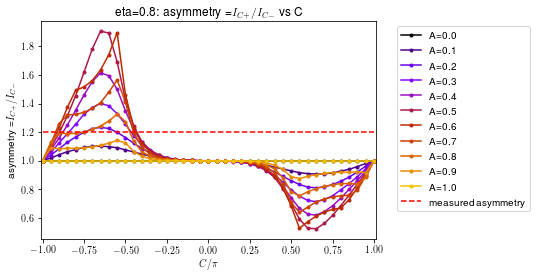

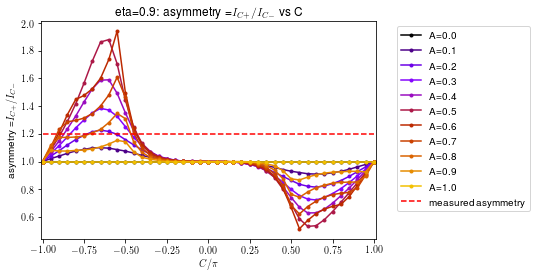

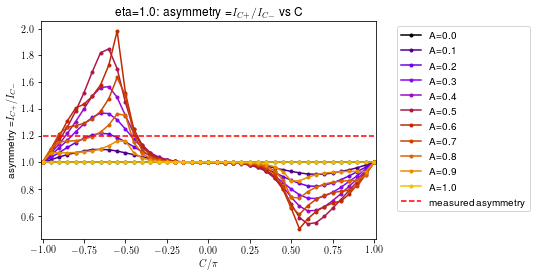

In [401]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,Ic_asymm_exp,'r--',label="measured asymmetry")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': asymmetry =$I_{C+}/I_{C-}$ vs C')
    plt.xlim([-1.01,1.01])
    plt.xlabel('$C/\pi$')
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

## Find peak heights

In [93]:
peak_n=np.empty([len(C),len(eta)])
peak_p=np.empty([len(C),len(eta)])
for j in range(0,len(eta)):
    for i in range(0,len(C)):
        peak_n[i,j],peak_p[i,j]=extract_Ic_and_peak.extract_height(IDC,np.squeeze(DVDI[i,:,j]))

### Plot peak heights vs C, grouped by the same $\eta$

In [94]:
colors = plt.cm.gnuplot(np.linspace(0,1,12))

In [95]:
size_A=11

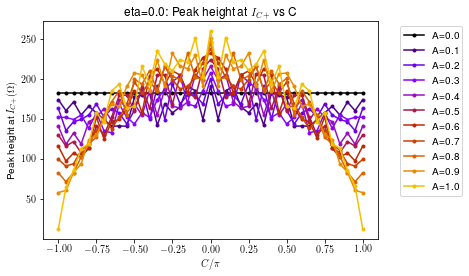

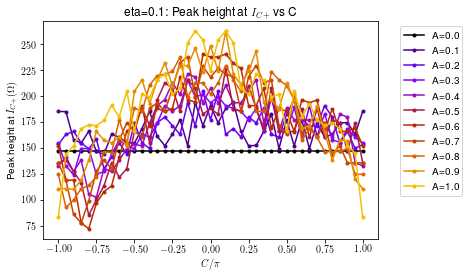

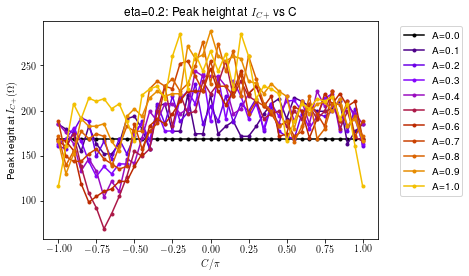

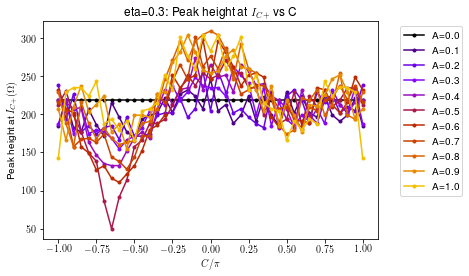

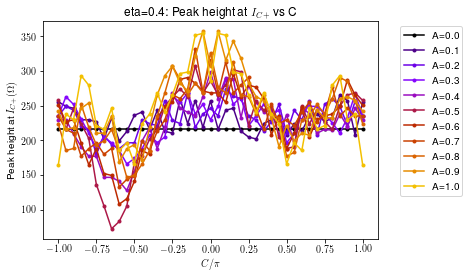

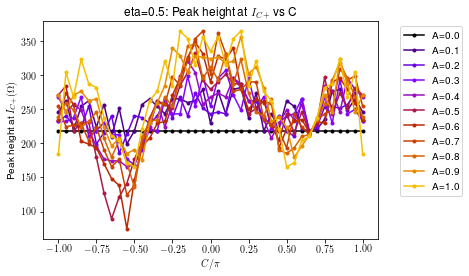

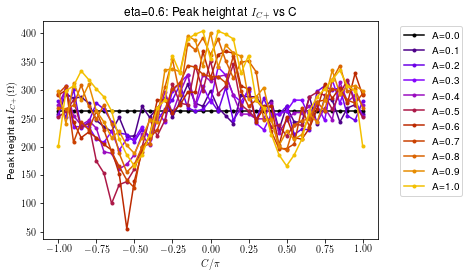

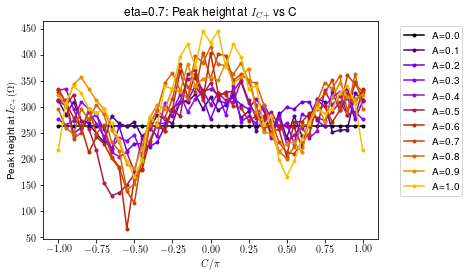

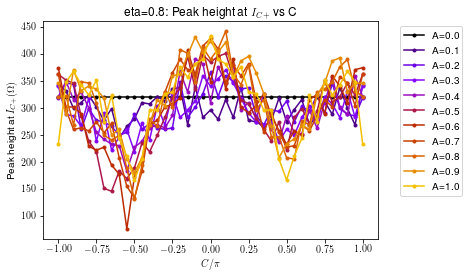

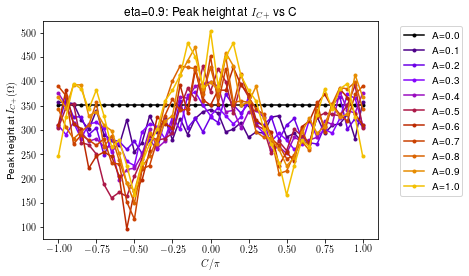

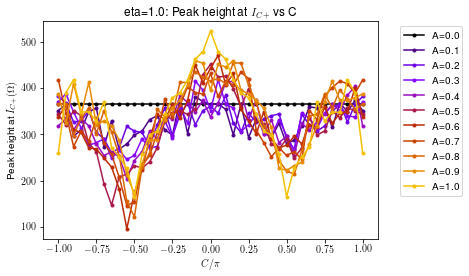

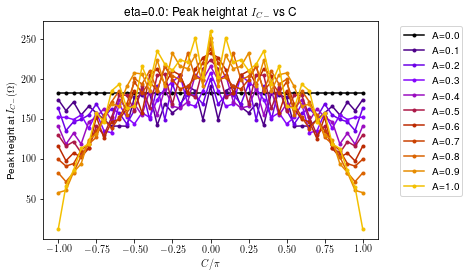

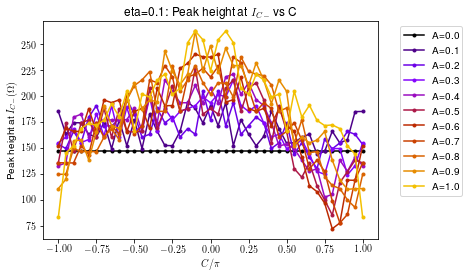

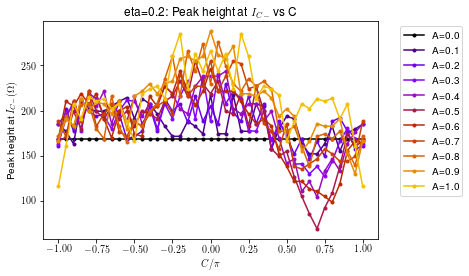

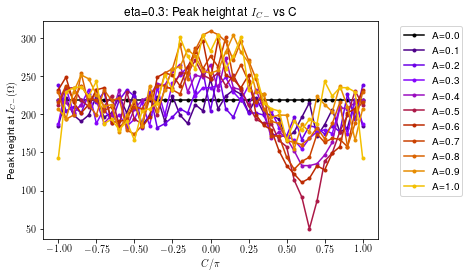

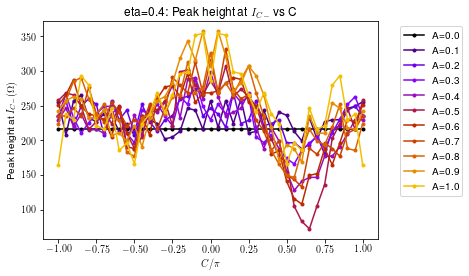

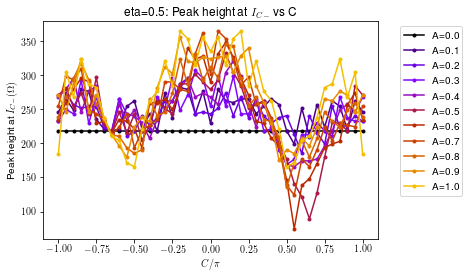

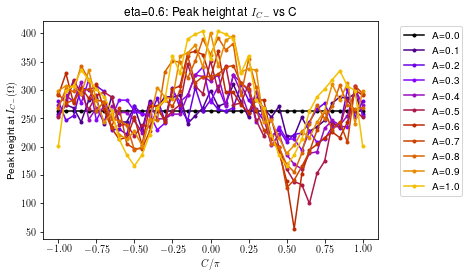

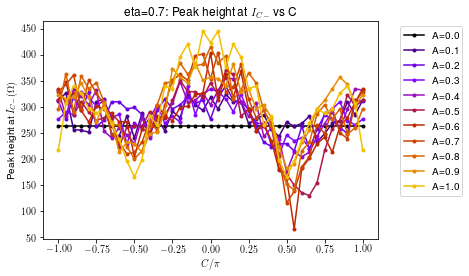

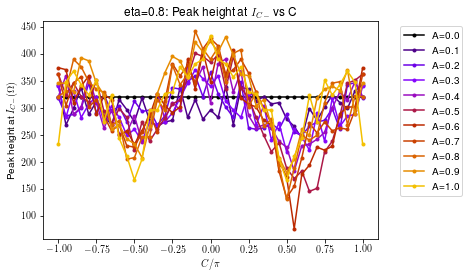

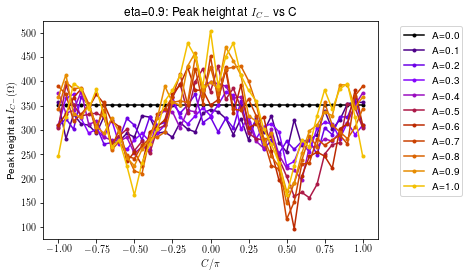

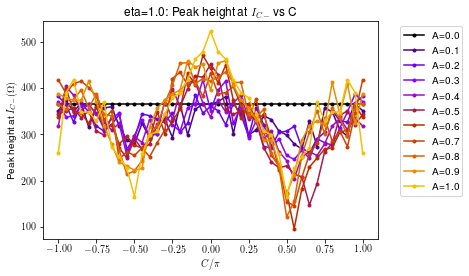

In [96]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_p[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C+}(\Omega)$')
    plt.show()

for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_n[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C-}(\Omega)$')
    plt.show()

### Peak height asymmetry vs C, grouped by the same $\eta$

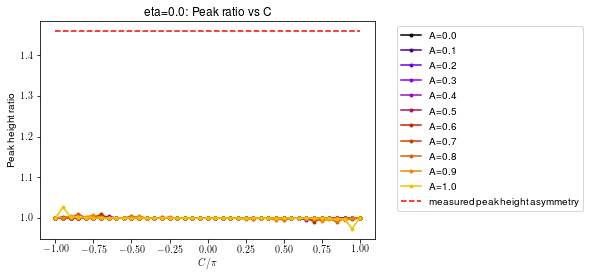

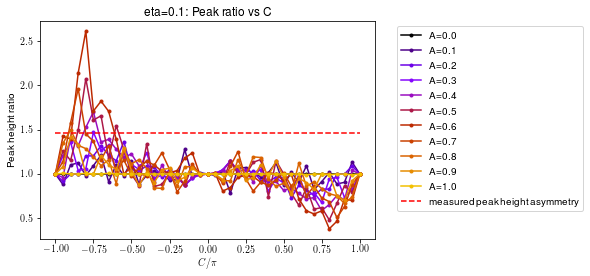

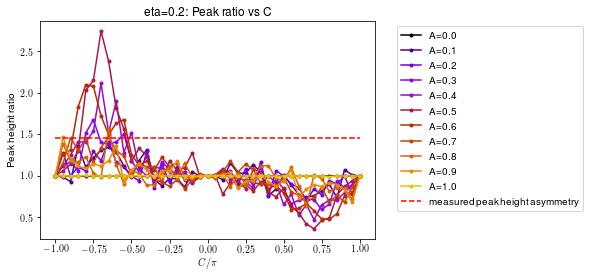

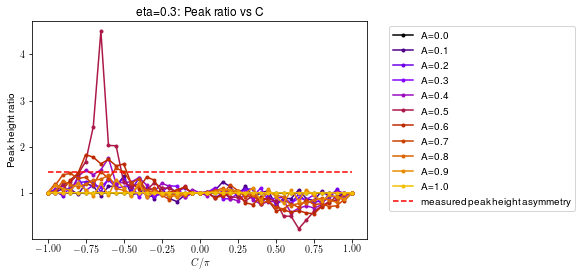

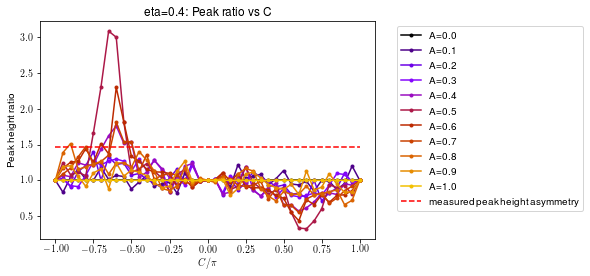

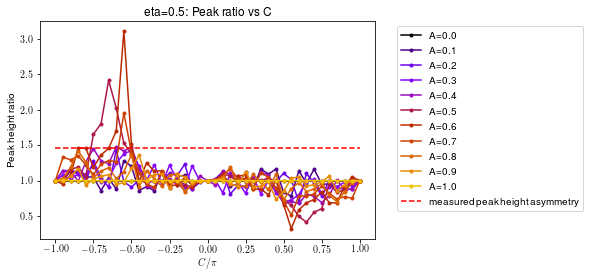

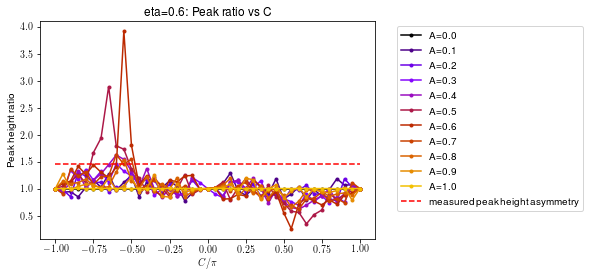

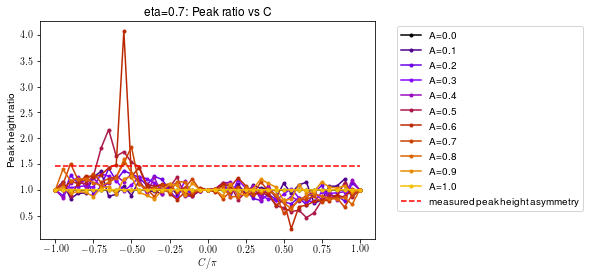

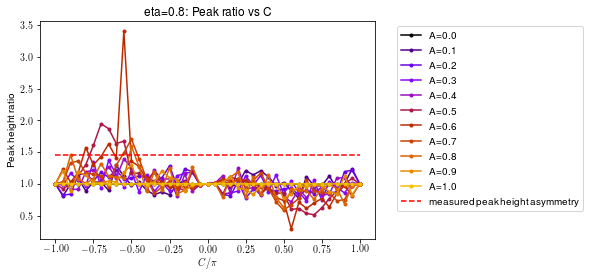

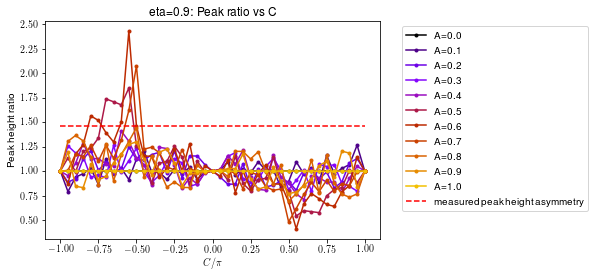

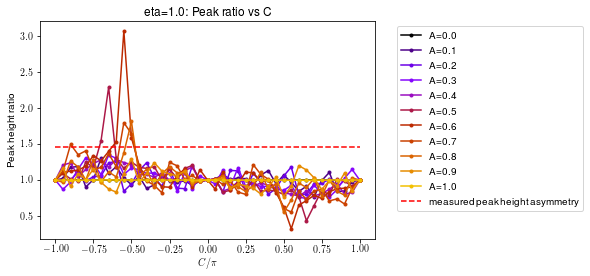

In [97]:
H_asymm_exp=np.ones(len(C))*1.46
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(j,len(eta),size_A):
        plt.plot(C/np.pi,peak_n[:,i]/peak_p[:,i],'.-',label='A='+str(A[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,H_asymm_exp,'r--',label="measured peak height asymmetry")

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak ratio vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height ratio')
    plt.show()

### Plot peak heights vs C, grouped by the same A

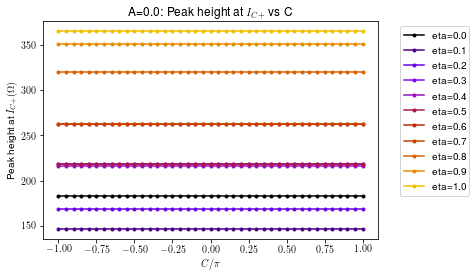

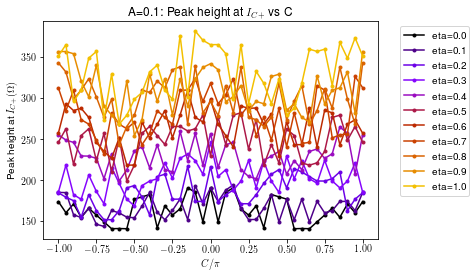

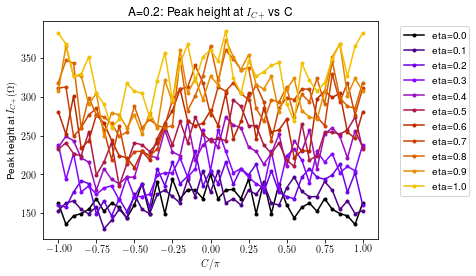

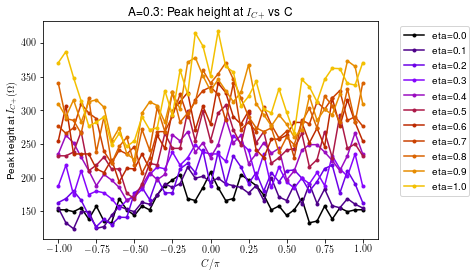

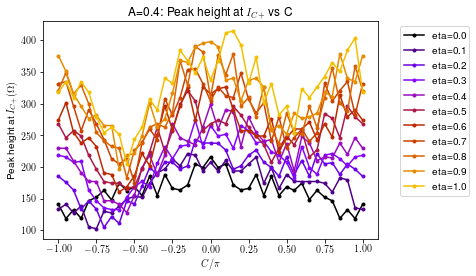

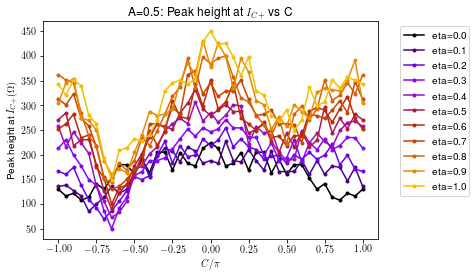

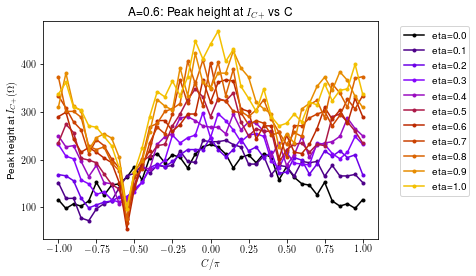

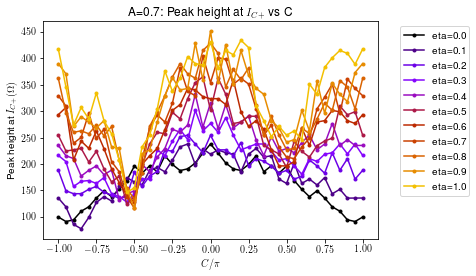

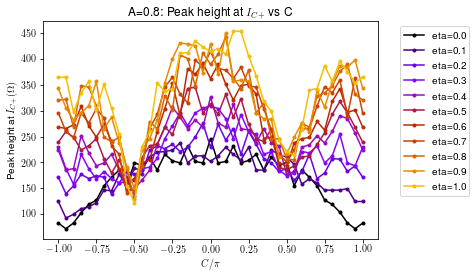

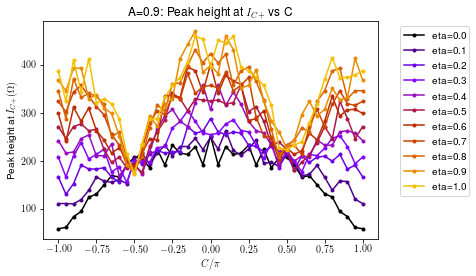

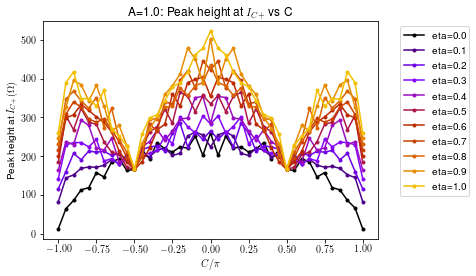

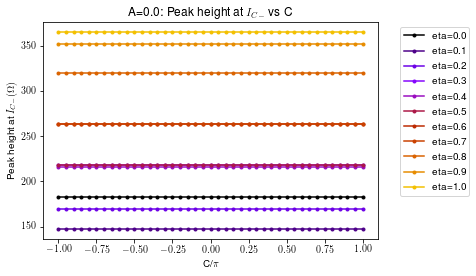

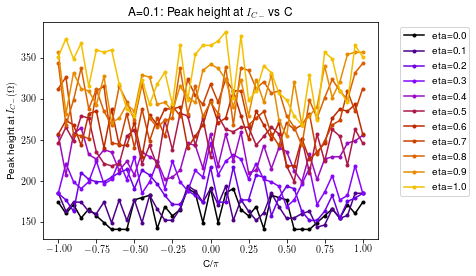

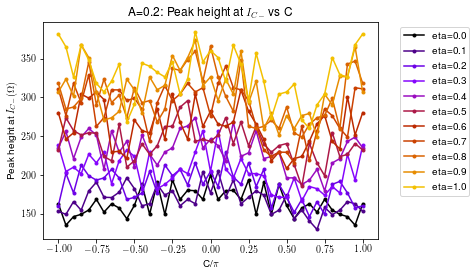

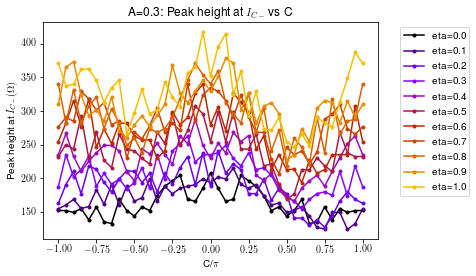

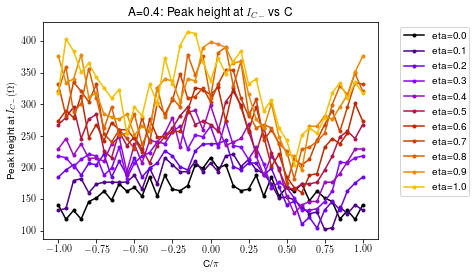

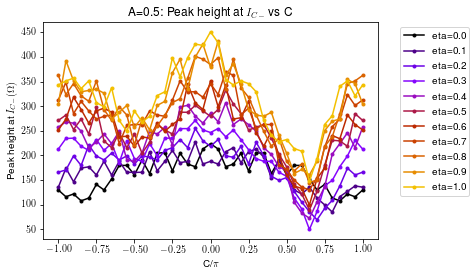

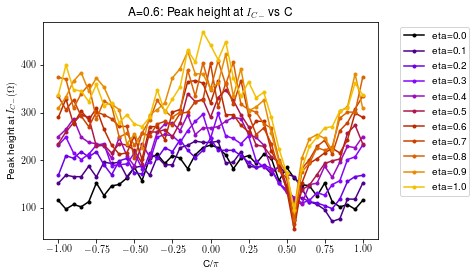

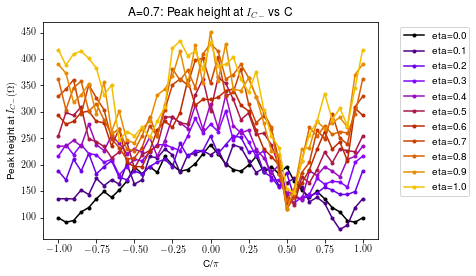

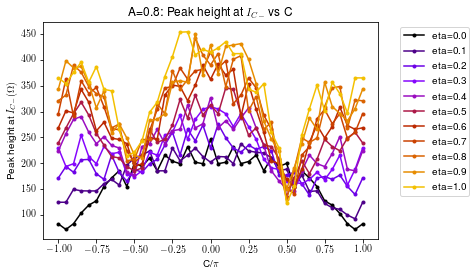

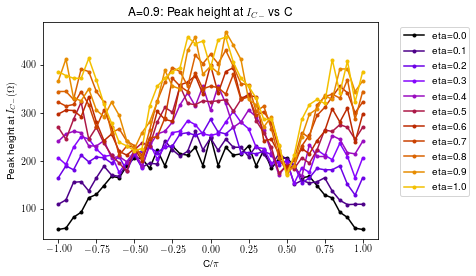

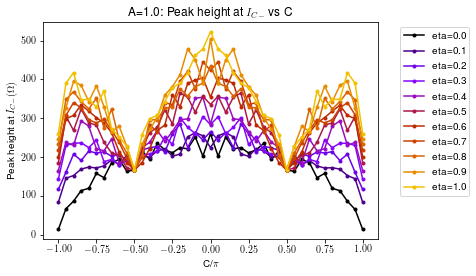

In [98]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,peak_p[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*size_A])+': Peak height at $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C+}(\Omega)$')
    plt.show()

for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,peak_n[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*size_A])+': Peak height at $I_{C-}$ vs C')
    plt.xlabel('C/$\pi$')
    plt.ylabel('Peak height at $I_{C-}(\Omega)$')
    plt.show()

### Peak height asymmetry vs C, grouped by the same A

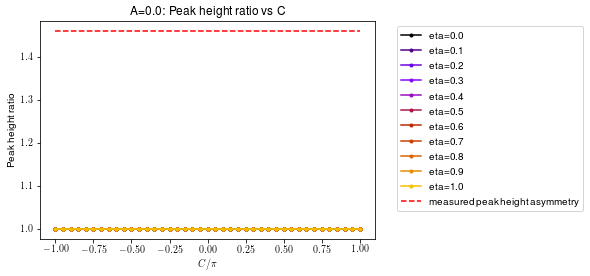

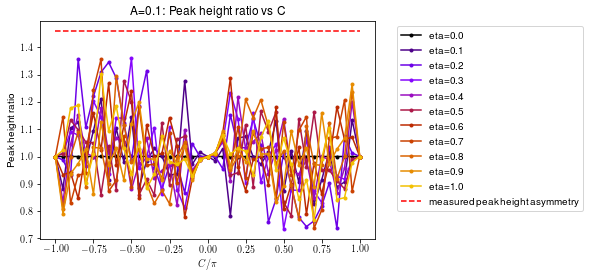

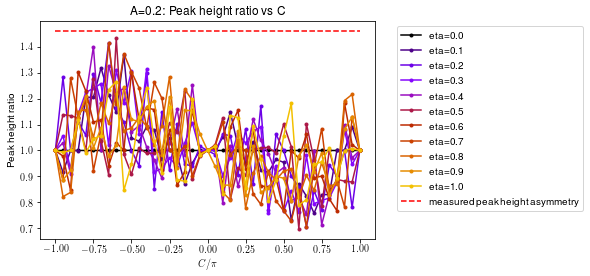

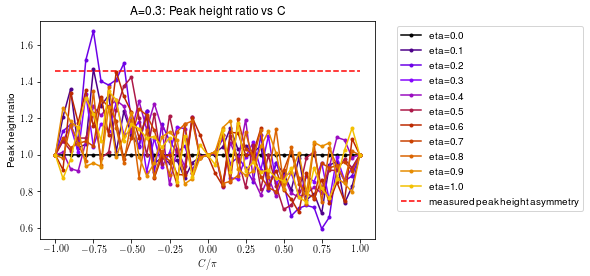

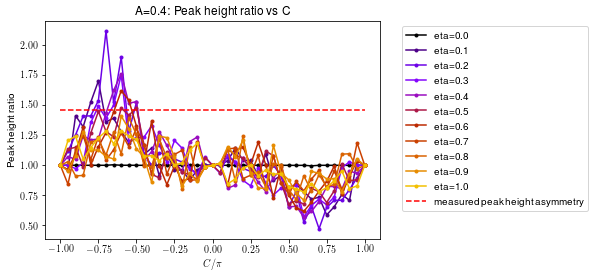

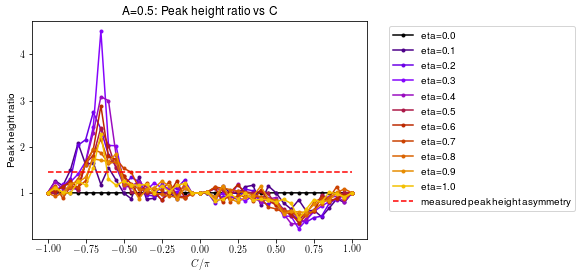

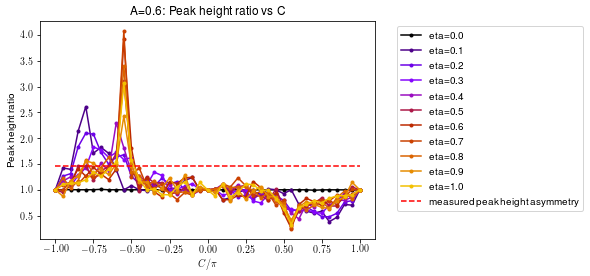

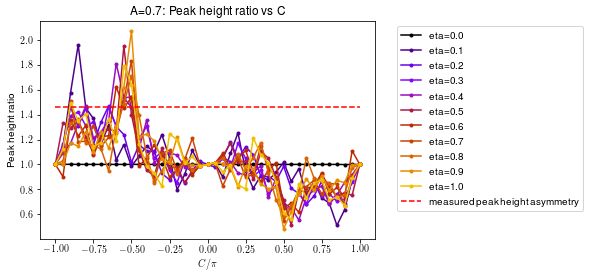

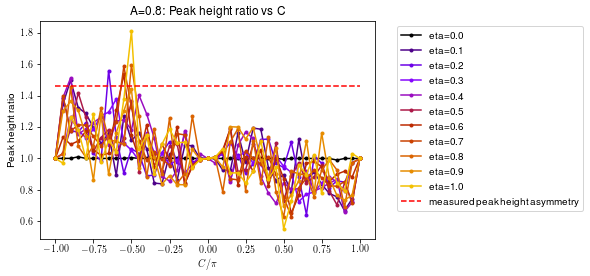

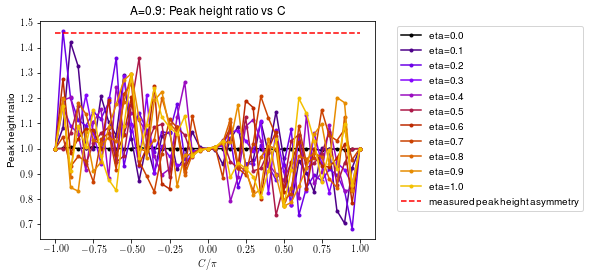

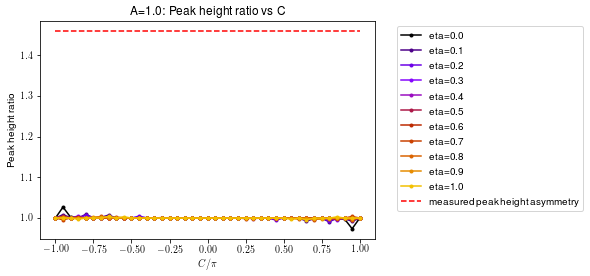

In [99]:
for j in range(0,size_A):
    plt.figure()
    cindx=0
    for i in range(0+j*size_A,(j+1)*size_A): 
        plt.plot(C/np.pi,peak_n[:,i]/peak_p[:,i],'.-',label='eta='+str(eta[i]),color=colors[cindx])
        cindx=cindx+1
    plt.plot(C/np.pi,H_asymm_exp,'r--',label="measured peak height asymmetry")

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*size_A])+': Peak height ratio vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height ratio')
    plt.show()

### Trying to find the dV/dI value next to the peak instead

### Append Ic's and peak heights to the .h5

In [16]:
with h5py.File('merged.h5', 'a') as f:
    dset = f.create_dataset("Icn", data=Icn)
    dset = f.create_dataset("Icp", data=Icp)
    dset = f.create_dataset("peak_n", data=peak_n)
    dset = f.create_dataset("peak_p", data=peak_p)

### Save it into a .csv file

In [74]:
np.savetxt("./eta0p7_A0p5/csv/IDC.csv", IDC, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/C.csv", C, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/V.csv", V, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/DVDI.csv", DVDI, delimiter=",")
